In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

![Con Vs Exp](284995792-08318891-36ab-49da-acc5-6eca9a5780c0.png)

In [2]:
df = pd.read_csv("ab_test_click_data.csv")

In [3]:
df

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00
...,...,...,...,...
19995,19996,1,con,NaN
19996,19997,1,con,NaN
19997,19998,1,con,NaN
19998,19999,0,con,NaN


In [5]:
df.head()

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [6]:
df.describe()

,user_id,click
count,20000.000000,20000.000000
mean,10000.500000,0.405250
std,5773.647028,0.490953
min,1.000000,0.000000
25%,5000.750000,0.000000
50%,10000.500000,0.000000
75%,15000.250000,1.000000
max,20000.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20000 non-null  int64 
 1   click      20000 non-null  int64 
 2   group      20000 non-null  object
 3   timestamp  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB


In [14]:
df.groupby("group").sum("click")

,user_id,click
group,,
con,150005000,1989
exp,50005000,6116


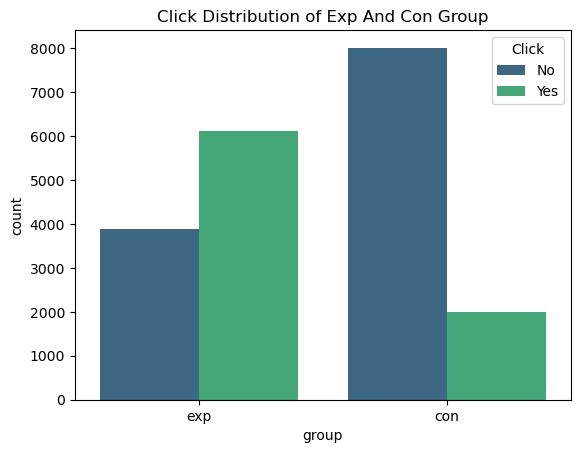

In [25]:
sns.countplot(data=df,x="group",hue='click',palette='viridis')
plt.title('Click Distribution of Exp And Con Group')
plt.legend(title='Click',labels=["No","Yes"])

## Power Analysis

In [27]:
alpha = 0.5 #Sig Level
delta = 0.1 # minimum detectable effect

In [43]:
# Calculating Total No Of Clicks
X_con = df.groupby("group")["click"].sum().loc["con"]
X_exp = df.groupby("group")["click"].sum().loc["exp"]
print("Number of Click in Control Group : ",X_con)
print("Number of Click in Experimental Group : ",X_exp)

Number of Click in Control Group :  1989
Number of Click in Experimental Group :  6116


In [59]:
N_con = df[df['group'] == "con"].count()
N_exp = df[df['group'] == "exp"].count()

## Calculate Probabilities

In [51]:
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)

## Pooled Varience

In [61]:
pooled_var = p_pooled_hat*(1-p_pooled_hat)*(1/N_con + 1/N_exp)

## St Error and Test Stat

In [62]:
SE = np.sqrt(pooled_var)

In [72]:
Test_stat = (p_con_hat-p_exp_hat)/SE
print("Test Stat:",Test_stat)

Test Stat: user_id     -59.441633
click       -59.441633
group       -59.441633
timestamp          NaN
dtype: float64


In [69]:
Z_crit = norm.ppf(1-alpha/2)

## P Value

In [77]:
p_val =2 * (1 - norm.cdf(abs(Test_stat)))